# COVID-19 India(Corona Virus Disease 2019)
    1.Caused by a SARS-COV-2 corona virus.
    2.First identified in Wuhan, Hubei, China. Earliest reported symptoms reported in November 2019.
    3.First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals.
    4.On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern

# Corona Virus

    1.Coronaviruses are zoonotic viruses (means transmitted between animals and people).
    2.Symptoms include from fever, cough, respiratory symptoms, and breathing difficulties.
    3.In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death.
    4.Coronaviruses are also asymptomatic, means a person can be a carrier for the infection but experiences no symptoms

# Objective

    1.The objective of the notebook is do explore the covid-19 situation in India and analyse the rate of spread in comparison to other      countries like Italy and Korea.
    
    2.As India is in the 2nd stage of the Pandemic, so this 2 weeks are very crucial to contain the virus and therefore my aim from this project is to understand the spread of of Covid-19 in India
    
    3.The Visualization gives insights and pattern of the Pandemic. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#essential libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as ex
import plotly.graph_objs as gp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import folium

#Colour codes
conf = '#393e46' 
deth = '#ff2e63'  
cure = '#21bf73'
acti = '#fe9801'

#Extra Libraries
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#To remove the warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv


# Data Preprocessing

In [2]:
df_india = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv',parse_dates=['Date'], dayfirst=True)
df_coordinates = pd.read_csv('/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv')
df_India_perday = pd.read_excel('/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='India', parse_dates=['Date'])
df_Italy_perday = pd.read_excel('/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='Italy', parse_dates=['Date'])
df_Korea_perday = pd.read_excel('/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='Korea', parse_dates=['Date'])

In [3]:
df_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0


In [4]:
df_coordinates.dropna(axis = 1, inplace = True)
df_coordinates.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [5]:
df_coordinates.rename(columns = {'Name of State / UT':'State/UnionTerritory'}, inplace = True)
df_coordinates.head()

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [6]:
df_india.shape

(446, 8)

In [7]:
df_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [8]:
df_india.dropna(axis = 0, inplace = True)

In [9]:
df_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [10]:
df_india["State/UnionTerritory"].replace({'Chattisgarh': 'Chhattisgarh ',
                                          'Chhattisgarh' :'Chhattisgarh ',
                                          'Puducherry' : 'Pondicherry',
                                          'Himachal Pradesh' : 'Himachal Pradesh ',
                                          'Madhya Pradesh' : 'Madhya Pradesh ',
                                          'Bihar':'Bihar ',
                                          'Himachal Pradesh':'Himachal Pradesh ',
                                          'Manipur':'Manipur ',
                                          'West Bengal':'West Bengal ',
                                          'Goa' : 'Goa '}, inplace=True)

In [11]:
df_india = pd.merge(df_india, df_coordinates, how='left', on='State/UnionTerritory')

In [12]:
df_india.isnull().sum()


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Latitude                    7
Longitude                   7
dtype: int64

In [13]:
df_india[['Latitude','Longitude']] = df_india[['Latitude','Longitude']].fillna(0)
df_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Latitude                    0
Longitude                   0
dtype: int64

In [14]:
df_india = df_india.drop('Sno', axis = 1) 
df_india.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Latitude,Longitude
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,8.900373,76.569993
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,8.900373,76.569993
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,8.900373,76.569993
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,8.900373,76.569993
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,8.900373,76.569993


In [15]:
df_india.shape

(446, 9)

In [16]:
df_india.to_csv('Processed_data.csv')

In [17]:
#Rearranging the columns
df_india = df_india[['Date', 'State/UnionTerritory', 'Latitude', 'Longitude','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths']]

In [18]:
Total_cases = ['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Active']

#Active = Confirmed - Deaths - Cured
df_india['Active'] = (df_india['ConfirmedIndianNational'] + df_india['ConfirmedForeignNational']) - df_india['Deaths'] - df_india['Cured']

In [19]:
df_india.head()

,Date,State/UnionTerritory,Latitude,Longitude,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,2020-01-30,Kerala,8.900373,76.569993,1,0,0,0,1
1,2020-01-31,Kerala,8.900373,76.569993,1,0,0,0,1
2,2020-02-01,Kerala,8.900373,76.569993,2,0,0,0,2
3,2020-02-02,Kerala,8.900373,76.569993,3,0,0,0,3
4,2020-02-03,Kerala,8.900373,76.569993,3,0,0,0,3


In [20]:
#Fill Null Values with Zeros
df_india[Total_cases] = df_india[Total_cases].fillna(0)

In [21]:
# cases in Maharashtra
maha = df_india[df_india['State/UnionTerritory'].str.contains('Maharashtra')]
maha.head()

,Date,State/UnionTerritory,Latitude,Longitude,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
76,2020-03-09,Maharashtra,19.250232,73.160175,2,0,0,0,2
91,2020-03-10,Maharashtra,19.250232,73.160175,5,0,0,0,5
97,2020-03-11,Maharashtra,19.250232,73.160175,2,0,0,0,2
120,2020-03-12,Maharashtra,19.250232,73.160175,11,0,0,0,11
133,2020-03-13,Maharashtra,19.250232,73.160175,14,0,0,0,14


In [22]:
# cases in Kerala
kerala = df_india[df_india['State/UnionTerritory'].str.contains('Kerala')]
kerala.head()

,Date,State/UnionTerritory,Latitude,Longitude,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,2020-01-30,Kerala,8.900373,76.569993,1,0,0,0,1
1,2020-01-31,Kerala,8.900373,76.569993,1,0,0,0,1
2,2020-02-01,Kerala,8.900373,76.569993,2,0,0,0,2
3,2020-02-02,Kerala,8.900373,76.569993,3,0,0,0,3
4,2020-02-03,Kerala,8.900373,76.569993,3,0,0,0,3


# GroupBy Tables

In [23]:
df_india_latest = df_india.groupby('Date')['ConfirmedIndianNational','ConfirmedForeignNational','Deaths', 'Cured', 'Active'].sum().reset_index()
df_india_latest.style.background_gradient(cmap='Reds')

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Deaths,Cured,Active
0,2020-01-30 00:00:00,1,0,0,0,1
1,2020-01-31 00:00:00,1,0,0,0,1
2,2020-02-01 00:00:00,2,0,0,0,2
3,2020-02-02 00:00:00,3,0,0,0,3
4,2020-02-03 00:00:00,3,0,0,0,3
5,2020-02-04 00:00:00,3,0,0,0,3
6,2020-02-05 00:00:00,3,0,0,0,3
7,2020-02-06 00:00:00,3,0,0,0,3
8,2020-02-07 00:00:00,3,0,0,0,3
9,2020-02-08 00:00:00,3,0,0,0,3


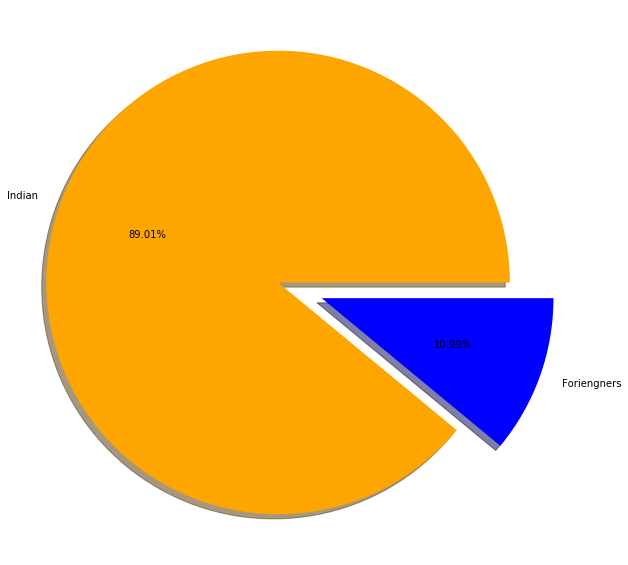

In [24]:
Indian_National = df_india['ConfirmedIndianNational'].sum()
Foreigners = df_india['ConfirmedForeignNational'].sum()
dct ={"Indian": Indian_National,"Foriengners":Foreigners}
colors=['orange','blue']
plt.figure(figsize = (10,10))
plt.pie(dct.values(),labels=dct.keys(),colors=colors,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

In [25]:
slate = df_india_latest[df_india_latest['Date']==max(df_india_latest['Date'])].reset_index(drop=True)
slate.style.background_gradient(cmap='copper')

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Deaths,Cured,Active
0,2020-03-28 00:00:00,826,47,19,79,775


In [26]:
plot = slate.melt(id_vars="Date", value_vars=['Active','Cured','Deaths'])
plot

,Date,variable,value
0,2020-03-28,Active,775
1,2020-03-28,Cured,79
2,2020-03-28,Deaths,19


# TreeMap

In [27]:
matt = ex.treemap(plot, path=['variable'], values="value", height=500, width=800,
                color_discrete_sequence=[acti,cure,deth])
matt.show() 

# State data

In [28]:
india_latest = df_india[df_india['Date']==max(df_india['Date'])].reset_index()
india_latest_groupby = india_latest.groupby('State/UnionTerritory')['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Active'].sum().reset_index()
india_latest_groupby.style.background_gradient(cmap='OrRd')

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,Andaman and Nicobar Islands,2,0,0,0,2
1,Andhra Pradesh,14,0,1,0,13
2,Bihar,9,0,0,1,8
3,Chandigarh,7,0,0,0,7
4,Chhattisgarh,6,0,0,0,6
5,Delhi,38,1,6,1,32
6,Goa,3,0,0,0,3
7,Gujarat,44,1,0,3,42
8,Haryana,19,14,11,0,22
9,Himachal Pradesh,3,0,0,1,2


In [29]:
#confirmed cases
state_confirmed = india_latest_groupby.sort_values(by='ConfirmedIndianNational', ascending=False)
state_confirmed = state_confirmed.reset_index(drop=True)
state_confirmed.style.background_gradient(cmap='OrRd')

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,Maharashtra,177,3,25,5,150
1,Kerala,165,8,11,0,162
2,Karnataka,55,0,3,2,50
3,Rajasthan,46,2,3,0,45
4,Uttar Pradesh,44,1,11,0,34
5,Gujarat,44,1,0,3,42
6,Telengana,38,10,1,0,47
7,Delhi,38,1,6,1,32
8,Punjab,38,0,1,1,36
9,Tamil Nadu,32,6,2,1,35


# States with Death cases

In [30]:
states_with_death = state_confirmed[state_confirmed['Deaths']>0][['State/UnionTerritory','Deaths']]
states_with_death.sort_values('Deaths',ascending=False).reset_index(drop=True).style.background_gradient(cmap='OrRd')

,State/UnionTerritory,Deaths
0,Maharashtra,5
1,Gujarat,3
2,Karnataka,2
3,Madhya Pradesh,2
4,Delhi,1
5,Punjab,1
6,Tamil Nadu,1
7,Jammu and Kashmir,1
8,West Bengal,1
9,Bihar,1


# States with no cured cases

In [31]:
no_recovery = state_confirmed[state_confirmed['ConfirmedIndianNational']+ state_confirmed['ConfirmedForeignNational'] == 
                              state_confirmed['Deaths']+ state_confirmed['Cured']]
no_recovery = no_recovery[['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Deaths','Cured']]
no_recovery = no_recovery.sort_values('ConfirmedIndianNational', ascending=False)
no_recovery['Cured'].count()

0

# Geographical representaion

In [32]:
#India
India = folium.Map(location=[20.5937,78.9629], tiles='cartodbpositron', min_zoom=4, max_zoom=10, zoom_start=4)
for i in range(0, len(df_india)):
    folium.Circle(
        location=[df_india.iloc[i]['Latitude'],df_india.iloc[i]['Longitude']],
                  color='crimson',
                  tooltip = '<li><bold>State/UnionTerritory : '+str(df_india.iloc[i]['State/UnionTerritory'])+
                            '<li><bold>ConfirmedIndianNational : '+str(df_india.iloc[i]['ConfirmedIndianNational'])+
                            '<li><bold>ConfirmedForeignNational : '+str(df_india.iloc[i]['ConfirmedForeignNational'])+
                            '<li><bold>Deaths : '+str(df_india.iloc[i]['Deaths'])+
                            '<li><bold>Cured : '+str(df_india.iloc[i]['Cured']),
                  radius=int(df_india.iloc[i]['ConfirmedIndianNational'])**1.1).add_to(India)
India

#The output is not 100% correct as there was some issue with the cordinates.

# Graph and plots over time

In [33]:
graph = df_india.groupby('Date')['Cured', 'Deaths', 'Active'].sum().reset_index()
graph = graph.melt(id_vars='Date', value_vars=['Cured', 'Deaths', 'Active'],
         var_name='Case', value_name='Count')
graph.head()

fig=ex.area(graph, x='Date', y='Count', color='Case',
           title = 'Cases over time', color_discrete_sequence=[cure, deth, acti])
fig.show()

# Cure_over_Death

In [34]:
Cure_over_Death = df_india.groupby('Date').sum().reset_index()

Cure_over_Death['No. of Deaths to 100 Confirmed Cases'] = round(Cure_over_Death['Deaths']/(Cure_over_Death['ConfirmedIndianNational']+Cure_over_Death['ConfirmedForeignNational']),3)*100
Cure_over_Death['No. of Recovered to 100 Confirmed Cases'] = round(Cure_over_Death['Cured']/(Cure_over_Death['ConfirmedIndianNational']+Cure_over_Death['ConfirmedForeignNational']),3)*100

Cure_over_Death = Cure_over_Death.melt(id_vars ='Date',
                          value_vars=['No. of Deaths to 100 Confirmed Cases','No. of Recovered to 100 Confirmed Cases'],
                          var_name='Ratio',
                          value_name='Value')

fig = ex.line(Cure_over_Death, x='Date', y='Value', color='Ratio', log_y=True,
             title='Cure_over_Death', color_discrete_sequence=[deth,cure])

fig.show()

In [35]:
df_india_data = df_india.drop(['Latitude', 'Longitude'], axis=1)
df_india_data['TotalConfirmed'] = df_india_data['ConfirmedIndianNational'] + df_india_data['ConfirmedForeignNational']
df_india_data = df_india_data[['Date', 'State/UnionTerritory','TotalConfirmed','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Active']]
df_india_data.head()

,Date,State/UnionTerritory,TotalConfirmed,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,2020-01-30,Kerala,1,1,0,0,0,1
1,2020-01-31,Kerala,1,1,0,0,0,1
2,2020-02-01,Kerala,2,2,0,0,0,2
3,2020-02-02,Kerala,3,3,0,0,0,3
4,2020-02-03,Kerala,3,3,0,0,0,3


# How covid spread in India over time

In [36]:

spread = df_india_data[df_india_data['TotalConfirmed']!=0].groupby('Date')['State/UnionTerritory'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

spread_graph = ex.line(spread, x='Date', y='State/UnionTerritory', text='State/UnionTerritory',
              title='Number of State/UnionTerritory to which COVID-19 spread over the time',
              color_discrete_sequence=[conf,deth, cure])
spread_graph.update_traces(textposition='top center')
spread_graph.show()

In [37]:
Spread = df_india_data.groupby(['Date', 'State/UnionTerritory'])['TotalConfirmed'].sum().reset_index().sort_values('TotalConfirmed', ascending=False)

ex.line(Spread, x="Date", y="TotalConfirmed", color='State/UnionTerritory', title='Spread over time', height=600)

In [38]:
latest_date = india_latest_groupby
latest_date['TotalConfirmed'] = latest_date['ConfirmedIndianNational'] + latest_date['ConfirmedForeignNational']
latest_date = latest_date[['State/UnionTerritory','TotalConfirmed','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Active']]
latest_date.head()

,State/UnionTerritory,TotalConfirmed,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Active
0,Andaman and Nicobar Islands,2,2,0,0,0,2
1,Andhra Pradesh,14,14,0,1,0,13
2,Bihar,9,9,0,0,1,8
3,Chandigarh,7,7,0,0,0,7
4,Chhattisgarh,6,6,0,0,0,6


In [39]:
Confirmed_bar = ex.bar(latest_date.sort_values('TotalConfirmed', ascending=False).head(30).sort_values('TotalConfirmed', ascending=True), 
             x="TotalConfirmed", y="State/UnionTerritory", title='Confirmed Cases', text='TotalConfirmed', orientation='h', 
             width=900, height=700, range_x = [0, max(latest_date['TotalConfirmed'])+15])
Confirmed_bar.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
Confirmed_bar.show()

In [40]:
Death_rate_bar = ex.bar(latest_date.sort_values('Deaths', ascending=False).head(30).sort_values('Deaths', ascending=True), 
             x="Deaths", y="State/UnionTerritory", title='Death in each state', text='Deaths', orientation='h', 
             width=800, height=700, range_x = [0, max(latest_date['Deaths'])+0.5])
Death_rate_bar.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
Death_rate_bar.show()

In [41]:
cure_bar = ex.bar(latest_date.sort_values('Cured', ascending=False).head(30).sort_values('Cured', ascending=True), 
             x="Cured", y="State/UnionTerritory", title='Cured cases', text='Cured', orientation='h', 
             width=800, height=700, range_x = [0, max(latest_date['Cured'])+4])
cure_bar.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
cure_bar.show()

In [42]:
Active_cases = ex.bar(latest_date.sort_values('Active', ascending=False).head(30).sort_values('Active', ascending=True), 
             x="Active", y="State/UnionTerritory", title='Active cases', text='Active', orientation='h', 
             width=800, height=700, range_x = [0, max(latest_date['Active'])+10])
Active_cases.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
Active_cases.show()

# Death per 20 cases

In [43]:
latest_date['Death Rate'] = round((latest_date['Deaths']/latest_date['TotalConfirmed'])*20,2)
Top_50 = latest_date[latest_date['TotalConfirmed']>20]
Top_50 = Top_50.sort_values('Death Rate', ascending=False)

Plot = ex.bar(Top_50.sort_values('Death Rate', ascending=False).head(20).sort_values('Death Rate', ascending=True), 
             x="Death Rate", y="State/UnionTerritory", text='Death Rate', orientation='h', 
             width=500, height=500, range_x = [0, 2], title='No. of Deaths Per 20 Confirmed Case')
Plot.update_traces(marker_color='#00a8cc', opacity=0.6, textposition='outside')
Plot.show()

# Date vs Confirmed,Cured,Death

In [44]:
#Date vs Confirmed
Date_vs_confirmed = df_india_data.groupby(['State/UnionTerritory', 'Date'])['TotalConfirmed', 'Deaths', 'Cured'].sum()
Date_vs_confirmed = Date_vs_confirmed.reset_index()

Date_vs_confirmed_fig = ex.bar(Date_vs_confirmed, x="Date", y="TotalConfirmed", color='State/UnionTerritory', orientation='v', height=600,
                        title='Date vs Confirmed', color_discrete_sequence = ex.colors.cyclical.mygbm)
Date_vs_confirmed_fig.show()

In [45]:
#Date vs Cured
Date_vs_cured = df_india_data.groupby(['State/UnionTerritory', 'Date'])['TotalConfirmed', 'Deaths', 'Cured'].sum()
Date_vs_cured = Date_vs_cured.reset_index()

Date_vs_cured_fig = ex.bar(Date_vs_cured, x="Date", y="Cured", color='State/UnionTerritory', orientation='v', height=600,
                        title='Date vs Cured', color_discrete_sequence = ex.colors.cyclical.mygbm)
Date_vs_cured_fig.show()

In [46]:
#Date vs Active
Date_vs_Deaths = df_india_data.groupby(['State/UnionTerritory', 'Date'])['TotalConfirmed', 'Deaths', 'Cured'].sum()
Date_vs_Deaths = Date_vs_Deaths.reset_index()

Date_vs_Deaths_fig = ex.bar(Date_vs_Deaths, x="Date", y="Deaths", color='State/UnionTerritory', orientation='v', height=600,
                        title='Date vs Active', color_discrete_sequence = ex.colors.cyclical.mygbm)
Date_vs_Deaths_fig.show()

# New +ve cases by day

In [47]:
new_cases = df_india_data.groupby(['State/UnionTerritory', 'Date', ])['TotalConfirmed', 'Deaths', 'Cured']
new_cases = new_cases.sum().diff().reset_index()

mat = new_cases['State/UnionTerritory'] != new_cases['State/UnionTerritory'].shift(1)

new_cases.loc[mat, 'TotalConfirmed'] = np.nan
new_cases.loc[mat, 'Deaths'] = np.nan
new_cases.loc[mat, 'Cured'] = np.nan

New_cases_plot = ex.bar(new_cases, x="Date", y="TotalConfirmed", color='State/UnionTerritory',title='New cases')
New_cases_plot.show()

# Scatter Plot

In [48]:
# Deaths vs Confirmed
Death_vs_Conf = latest_date.sort_values('Deaths', ascending=False).iloc[:15, :]

Death_vs_Conf_plot = ex.scatter(Death_vs_Conf, 
                 x='TotalConfirmed', y='Deaths', color='State/UnionTerritory',
                 text='State/UnionTerritory', log_x=True, log_y=True, title='Deaths vs Confirmed')
Death_vs_Conf_plot.update_traces(textposition='top center')
Death_vs_Conf_plot.show()

In [49]:
#Cured vs Confirmed
Cured_vs_Conf = latest_date.sort_values('Cured', ascending=False).iloc[:15, :]

Cured_vs_Conf_plot = ex.scatter(Death_vs_Conf, 
                 x='TotalConfirmed', y='Cured', color='State/UnionTerritory',
                 text='State/UnionTerritory', log_x=True, log_y=True, title='Cured vs Confirmed')
Cured_vs_Conf_plot.update_traces(textposition='top center')
Cured_vs_Conf_plot.show()

# Comparison with Italy, South Korea

In [50]:
"""
df_India_perday
df_Italy_perday
df_Korea_perday
"""

Comparison = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

Comparison.add_trace(gp.Bar(x=df_Korea_perday['Date'], y=df_Korea_perday['Total Cases'],
                    marker= dict(color=df_Korea_perday['Total Cases'], coloraxis="coloraxis")),
              1, 1)

Comparison.add_trace(gp.Bar(x=df_Italy_perday['Date'], y=df_Italy_perday['Total Cases'],
                    marker= dict(color=df_Italy_perday['Total Cases'], coloraxis="coloraxis")),
              1, 2)

Comparison.add_trace(gp.Bar(x=df_india_data['Date'], y=df_india_data['TotalConfirmed'],
                    marker= dict(color=df_india_data['TotalConfirmed'], coloraxis="coloraxis")),
              2, 1)

Comparison.update_layout(coloraxis=dict(colorscale='RdBu'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

Comparison.update_layout(plot_bgcolor='rgb(250, 242, 242)')
Comparison.show()

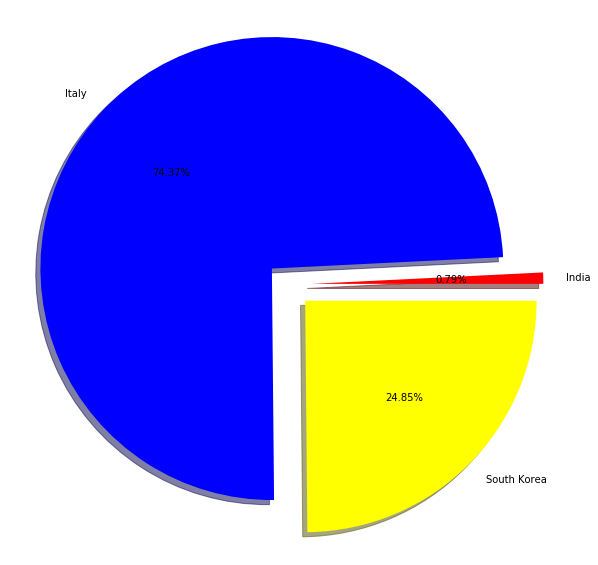

In [51]:
India = df_india_data['TotalConfirmed'].sum()
Italy = df_Italy_perday['Total Cases'].sum()
South_Korea = df_Korea_perday['Total Cases'].sum()
dict ={"India": India,"Italy":Italy, 'South Korea':South_Korea}
colors=['red','blue', 'yellow']
plt.figure(figsize = (10,10))
plt.pie(dict.values(),labels=dict.keys(),colors=colors,shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()